## Import libraries

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from sklearn.preprocessing import LabelEncoder

from torch.utils.data import TensorDataset, DataLoader

from transformers import BertTokenizer, AdamW, BertForSequenceClassification

## Import dataset

In [2]:
project_dir = os.path.dirname(os.getcwd())

In [3]:
df = pd.read_csv(os.path.join(project_dir, 'data', 'processed', 'processed_data.csv'))

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,statement,status,num_of_characters,num_of_sentences,cleaned_statement
0,0,0,oh my gosh,Anxiety,10,1,oh gosh
1,1,1,"trouble sleeping, confused mind, restless hear...",Anxiety,64,2,trouble sleeping confused mind restless heart ...
2,2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety,78,2,wrong back dear forward doubt stay restless re...
3,3,3,I've shifted my focus to something else but I'...,Anxiety,61,1,ive shifted focus something else im still worried
4,4,4,"I'm restless and restless, it's been a month n...",Anxiety,72,2,im restless restless month boy mean


In [5]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
statement            0
status               0
num_of_characters    0
num_of_sentences     0
cleaned_statement    0
dtype: int64

## Tokenization

In [6]:
os.environ['HF_HUB_DISABLE_SYMLINKS_WARNING'] = '1'
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Determine the max_lenght

In [7]:
text_lengths = [len(tokenizer.tokenize(text)) for text in df["cleaned_statement"]]

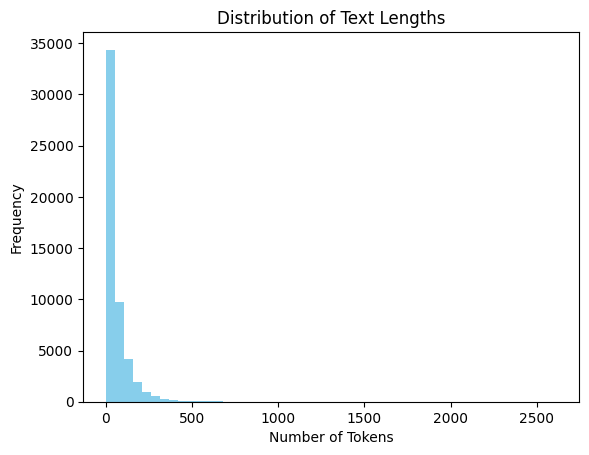

In [8]:
plt.hist(text_lengths, bins=50, color='skyblue')
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()

In [9]:
max_len_95 = int(np.percentile(text_lengths, 95))
print(f"Suggested max_length (95th percentile): {max_len_95}")

Suggested max_length (95th percentile): 198


In [10]:
max_length = 256

def tokenize_text(text):
    return tokenizer(text, 
                     padding='max_length', 
                     truncation=True, 
                     max_length=max_length, 
                     return_tensors="pt")

Check out with an example.

In [14]:
original_text_example = df['cleaned_statement'][0]
tokenized_text_example = tokenize_text(df['cleaned_statement'][0])
print(f'Original text: {original_text_example}\nTokenized text: {tokenized_text_example}')

Original text: oh gosh
Tokenized text: {'input_ids': tensor([[ 101, 2821, 2175, 4095,  102,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,

Convert statements and statuses to lists.

In [17]:
texts = df['cleaned_statement'].tolist()
labels = df['status'].tolist()

Tokenize inputs.

In [18]:
tokenized_inputs = tokenizer(texts, 
                             padding=True, 
                             truncation=True, 
                             max_length=max_length, 
                             return_tensors="pt")

Extract token IDs and differenciate real and padding IDs with attention mask.

In [19]:
input_ids = tokenized_inputs["input_ids"]
attention_masks = tokenized_inputs["attention_mask"]

Convert the labels into numeric format.

In [20]:
label_encoder = LabelEncoder()
encoded_labels = torch.tensor(label_encoder.fit_transform(labels))

BERT requires data to be loaded in batches. Use PyTorch’s TensorDataset and DataLoader.

In [23]:
dataset = TensorDataset(input_ids, attention_masks, encoded_labels)
batch_size = 16
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

Load pretrained BERT model.

In [29]:
num_labels = len(set(labels))  # Number of unique labels

Web option.

In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=num_labels)

Define optimizer and loss function.

In [27]:
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

NameError: name 'model' is not defined